### Generate some statistics and have some fun with ticks

In [1]:
# Who is the most wordy average tick length? Plot average and total characters
# Longest tick award


In [2]:
# Install Packages
from IPython.display import clear_output

In [3]:
# Import Packages
from IPython.display import clear_output
import requests
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time

In [4]:
# Create array of input csv to be analyzed
FriendsList = []
FriendsCsvFiles = []

FriendsListPath = "./MPcsv/Climbing_Friends.csv"
# Change this to specific date if you want
today = datetime.today().strftime("%m-%d-%Y")

with open(FriendsListPath, "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    for row in reader:
        FriendsList.append(row)

#Input csv files to be analyzed
for friend in FriendsList[1:]:
    FriendsCsvFiles.append('./MPcsv/' + friend[0] + "-" + today + ".csv")
                           
# print(FriendsList)
# print(FriendsCsvFiles)

In [5]:
def analyze_csv_character_counts(csv_files):
    """
    Analyzes the character counts of the notes column within ticks for each friend. Keep track of total 
    character length, average characters per tick, and longest tick.

    Args:
        csv_files (list): List of CSV file paths to process.

    Returns:
        list: A list of dictionaries containing the total and average character count for each file.
              Example: [{'file': 'file1.csv', 'total_chars': 100, 'average_chars': 10.0}, ...]
    """
    results = []

    for file in csv_files:
        total_characters = 0
        row_count = 0
        longest_tick = 0
        i=0
        try:
            with open(file, mode="r", newline="", encoding="utf-8") as csv_file:
                reader = csv.reader(csv_file)
                next(reader, None)  # Skip the header row
                personal_longest = 0
                personal_longest_str = []
                for row in reader:
                    if len(row) >= 4:  # Ensure there is a fourth column
                        total_characters += len(row[3])
                        row_count += 1
                        if len(row[3]) >= personal_longest:
                            personal_longest = len(row[3])
                            personal_longest_str = row[3]
            # Calculate average characters per row
            average_characters = total_characters / row_count if row_count > 0 else 0
            results.append({
                'file': file,
                'total_chars': total_characters,
                'average_chars': average_characters,
                'pers_longest_cont' : personal_longest,
                'pers_longest_text' : personal_longest_str
            })

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            results.append({
                'file': file,
                'total_chars': 0,
                'average_chars': 0,
                'error': str(e)
            })

    return results



### Friend Tick Statistics 

In [6]:
results = analyze_csv_character_counts(FriendsCsvFiles)
print(
    f"{'Friend':<15}{'Total Characters':>8}{'Average Characters':>25}{'Longest Tick':>21}"
)
print('-' * 80)
for result, friend in zip(results, FriendsList[1:]):
    print(f"{friend[0]:<15}{result['total_chars']:>10}{np.round(result['average_chars'],2):>25}{result['pers_longest_cont']:>23}")

Friend         Total Characters       Average Characters         Longest Tick
--------------------------------------------------------------------------------
Eric                47310                   199.62                   1361
Link                83132                    92.57                    515
Jack                21873                    35.28                    836
Susan               16541                     69.5                    638
Oak                 43323                    24.31                    239
Annie               44591                    26.05                    255
Kelsey                991                     7.56                    231
Lucia                  34                     4.86                     17
Holly                2949                    81.92                    481
Elizabeth           11893                    95.91                   1532
Mikkel                425                     7.87                    137
Brandon                11  

### Check Friend's Longest Tick

In [7]:
# Print Friends Longest Ticks
FriendsLongTick = 'Link'

# Find Index cooresponding to name
for i, Name in enumerate(FriendsList):
    if FriendsLongTick in Name:  # Check if the keyword is in the string
        FriendInd = i-1

print(FriendsList[FriendInd+1][0] + "'s Longest tick is ", results[FriendInd]['pers_longest_cont']," characters.")
print("Here it is: \n \n", results[FriendInd]['pers_longest_text'])

Link's Longest tick is  515  characters.
Here it is: 
 
 As someone that got into climbing due to a love of falling, this route (and maybe eldo in general) isn’t for me. I don’t love climbing when I shouldn’t fall, and that is what this route is about. P1 was fun and burly. For P3, followed bolts up the 11 var. P4 is actually protected well enough with a 0.2 alien. But then the next good hold is a dinner plate that will not survive another decade before being choss. I don’t think this route should be a classic and I think this route losses a hold every couple years.


### Plot Friend group tick lengths

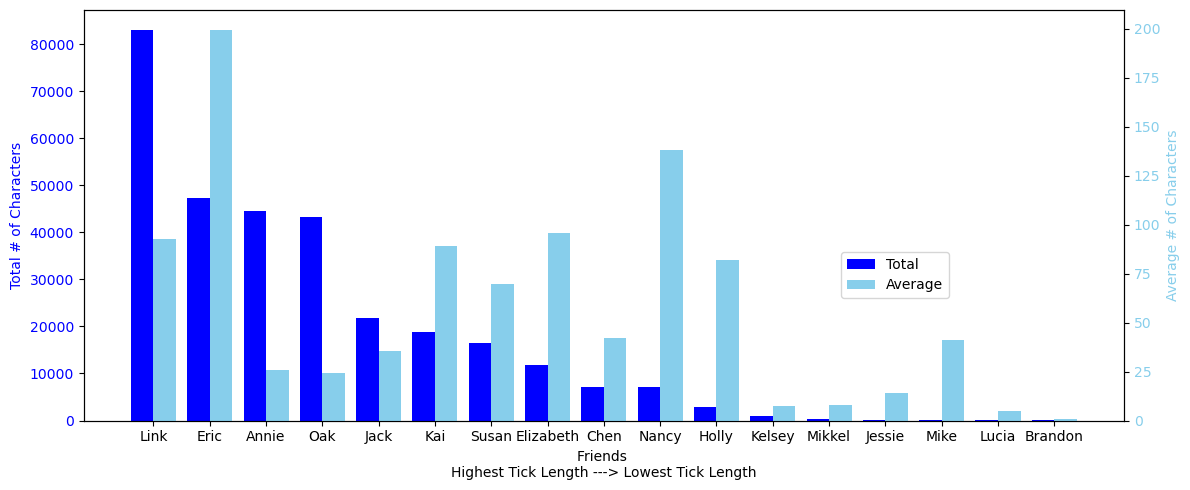

In [8]:
FriendsAnalyzed = []
AverageTickLength = []
TotalTickLength = []

for result, friend in zip(results, FriendsList[1:]):
    FriendsAnalyzed.append(friend[0])
    AverageTickLength.append(np.round(result['average_chars'],2))
    TotalTickLength.append(result['total_chars'])
    
# Sort the data by values in ascending order
sorted_indices = np.argsort(TotalTickLength)[::-1]  # Get the indices that would sort the values
# Resort
FriendsAnalyzed = [FriendsAnalyzed[i] for i in sorted_indices]
AverageTickLength = [AverageTickLength[i] for i in sorted_indices]
TotalTickLength = [TotalTickLength[i] for i in sorted_indices]

# Number of groups
x = np.arange(len(FriendsAnalyzed))
color1 = 'blue'
color2 = 'skyblue'

# Bar width
bar_width = 0.4

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the first set of values on the primary y-axis
bars1 = ax1.bar(x - bar_width / 2, TotalTickLength, width=bar_width, label="Total", color=color1)
ax1.set_ylabel("Total # of Characters", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width / 2, AverageTickLength, width=bar_width, label="Average", color=color2)
ax2.set_ylabel("Average # of Characters", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set the x-axis labels
plt.xticks(x, FriendsAnalyzed)
ax1.set_xlabel("Friends \nHighest Tick Length ---> Lowest Tick Length")


# Add legends for both axes
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

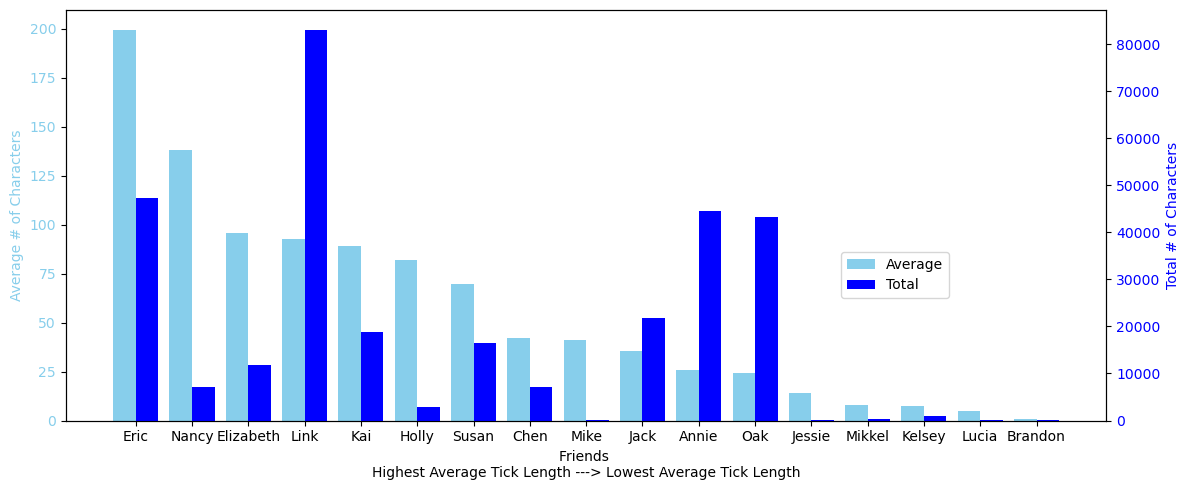

In [9]:
FriendsAnalyzed = []
AverageTickLength = []
TotalTickLength = []

for result, friend in zip(results, FriendsList[1:]):
    FriendsAnalyzed.append(friend[0])
    AverageTickLength.append(np.round(result['average_chars'],2))
    TotalTickLength.append(result['total_chars'])
    
# Sort the data by values in ascending order
sorted_indices = np.argsort(AverageTickLength)[::-1]  # Get the indices that would sort the values
# Resort
FriendsAnalyzed = [FriendsAnalyzed[i] for i in sorted_indices]
AverageTickLength = [AverageTickLength[i] for i in sorted_indices]
TotalTickLength = [TotalTickLength[i] for i in sorted_indices]

# Number of groups
x = np.arange(len(FriendsAnalyzed))
color1 = 'skyblue'
color2 = 'blue'

# Bar width
bar_width = 0.4

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the first set of values on the primary y-axis
bars1 = ax1.bar(x - bar_width / 2, AverageTickLength, width=bar_width, label="Average", color=color1)
ax1.set_ylabel("Average # of Characters", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width / 2, TotalTickLength, width=bar_width, label="Total", color=color2)
ax2.set_ylabel("Total # of Characters", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set the x-axis labels
plt.xticks(x, FriendsAnalyzed)
ax1.set_xlabel("Friends \nHighest Average Tick Length ---> Lowest Average Tick Length")


# Add legends for both axes
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

# Show the plot
plt.tight_layout()
plt.show()